# EDA

In [ ]:
import pandas as pd

img_path = '/root/data/home/data/prcd_train_labels.csv'
data = pd.read_csv(img_path)
data.head()


ID  target
0  ed6965390c27e093_original.jpg       9
1     ed6965390c27e093_aug_1.jpg       9
2     ed6965390c27e093_aug_2.jpg       9
3     ed6965390c27e093_aug_3.jpg       9
4     ed6965390c27e093_aug_4.jpg       9

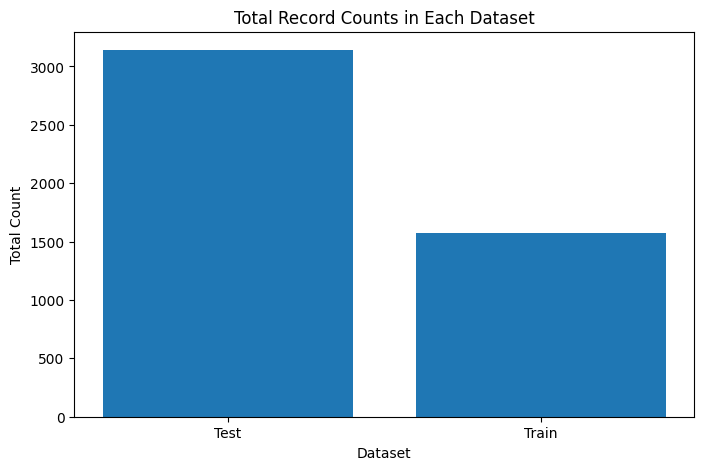

In [5]:
# Visualizing the total counts of records in each dataset
sample_submission_path = '/root/data/home/data/sample_submission.csv'
train_labels_path = '/root/data/home/data/train.csv'
sample_submission = pd.read_csv(sample_submission_path)
prcd_train_labels = pd.read_csv(train_labels_path)

# Get the count of rows in each dataset
sample_submission_count = len(sample_submission)
prcd_train_labels_count = len(prcd_train_labels)

# Plotting the counts
plt.figure(figsize=(8, 5))
plt.bar(['Test', 'Train'], [sample_submission_count, prcd_train_labels_count])
plt.title('Total Record Counts in Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Total Count')
plt.show()


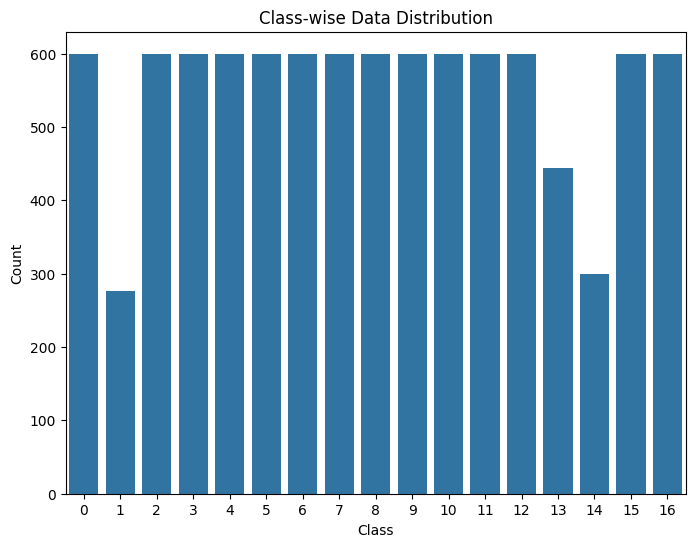

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
class_counts = data['target'].value_counts()

# 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class-wise Data Distribution')
plt.show()

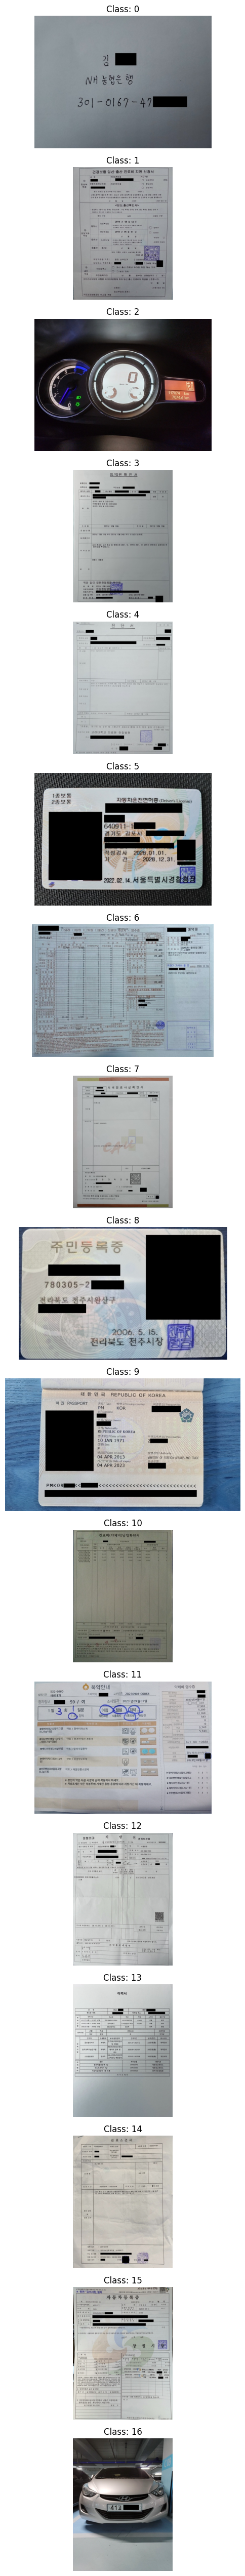

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

# 경로 설정
img_dir = '/root/data/home/data/train'
labels_file = '/root/data/home/data/train.csv'

# CSV 파일에서 이미지 파일명과 클래스 라벨 읽기
labels_df = pd.read_csv(labels_file)

# 클래스별로 그룹화
class_groups = labels_df.groupby('target')

# 각 클래스별로 샘플 이미지 시각화
num_samples_per_class = 1  # 클래스당 표시할 이미지 개수
fig, axes = plt.subplots(len(class_groups), num_samples_per_class, figsize=(20, len(class_groups) * 3))

# 1차원 배열로 사용할 경우, axes를 리스트처럼 다루기 위해 flatten() 사용
axes = axes.flatten()

for i, (class_label, group) in enumerate(class_groups):
    # 해당 클래스에서 랜덤하게 이미지 파일 선택
    sample_files = group['ID'].sample(num_samples_per_class).values
    for j, file_name in enumerate(sample_files):
        file_path = os.path.join(img_dir, file_name)
        if os.path.isfile(file_path):
            with Image.open(file_path) as img:
                axes[i].imshow(img)
                axes[i].axis('off')
                axes[i].set_title(f'Class: {class_label}')

plt.tight_layout()
plt.show()


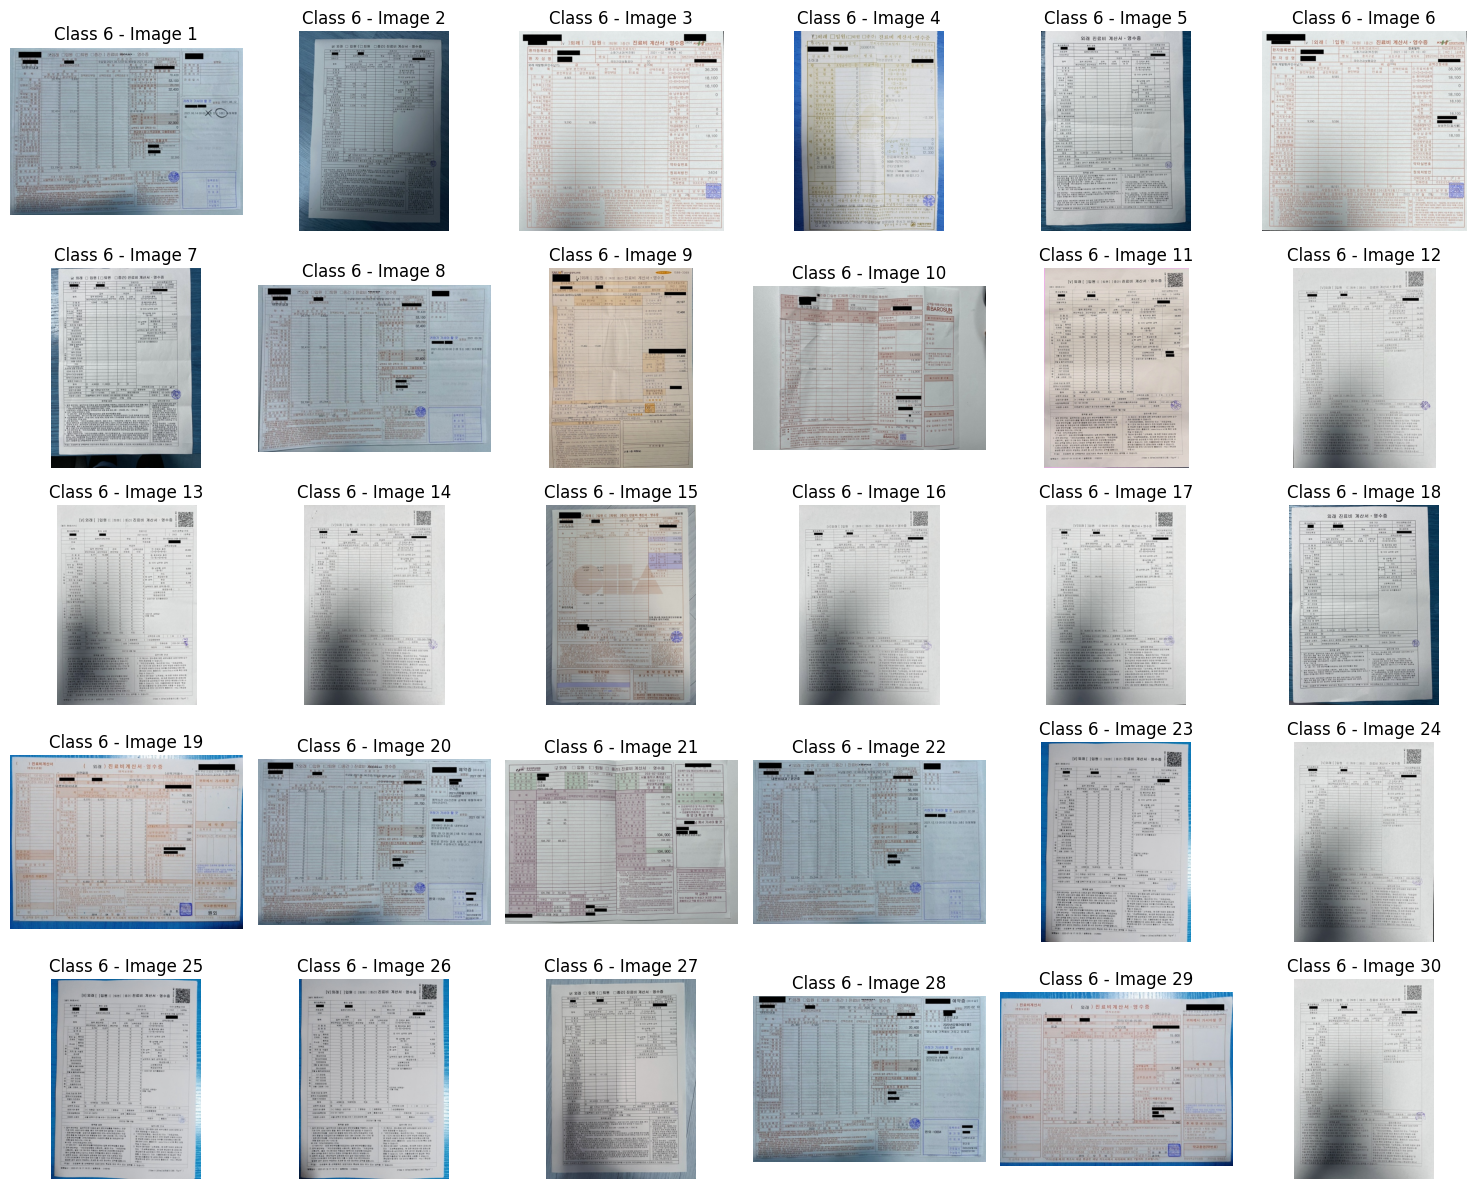

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


# 경로 설정
img_dir = '/root/data/home/data/train'
labels_file = '/root/data/home/data/train.csv'

# CSV 파일에서 이미지 파일명과 클래스 라벨 읽기
labels_df = pd.read_csv(labels_file)

# 클래스 6에 해당하는 이미지 필터링
class_6_images = labels_df[labels_df['target'] == 6]
# 클래스 6에 해당하는 이미지가 30개 이상 있는지 확인
num_images = min(30, len(class_6_images))  # 최대 30개 선택

# 시각화 설정
fig, axes = plt.subplots(5, 6, figsize=(15, 12))  # 5행 6열 그리드로 설정
axes = axes.flatten()

for i in range(num_images):
    file_name = class_6_images.iloc[i]['ID']
    file_path = os.path.join(img_dir, file_name)
    
    if os.path.isfile(file_path):
        with Image.open(file_path) as img:
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f'Class 6 - Image {i+1}')
    else:
        print(f"이미지 파일 {file_name}을(를) 찾을 수 없습니다.")

# 남은 빈 플롯 숨기기
for j in range(num_images, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# ImagSize eda

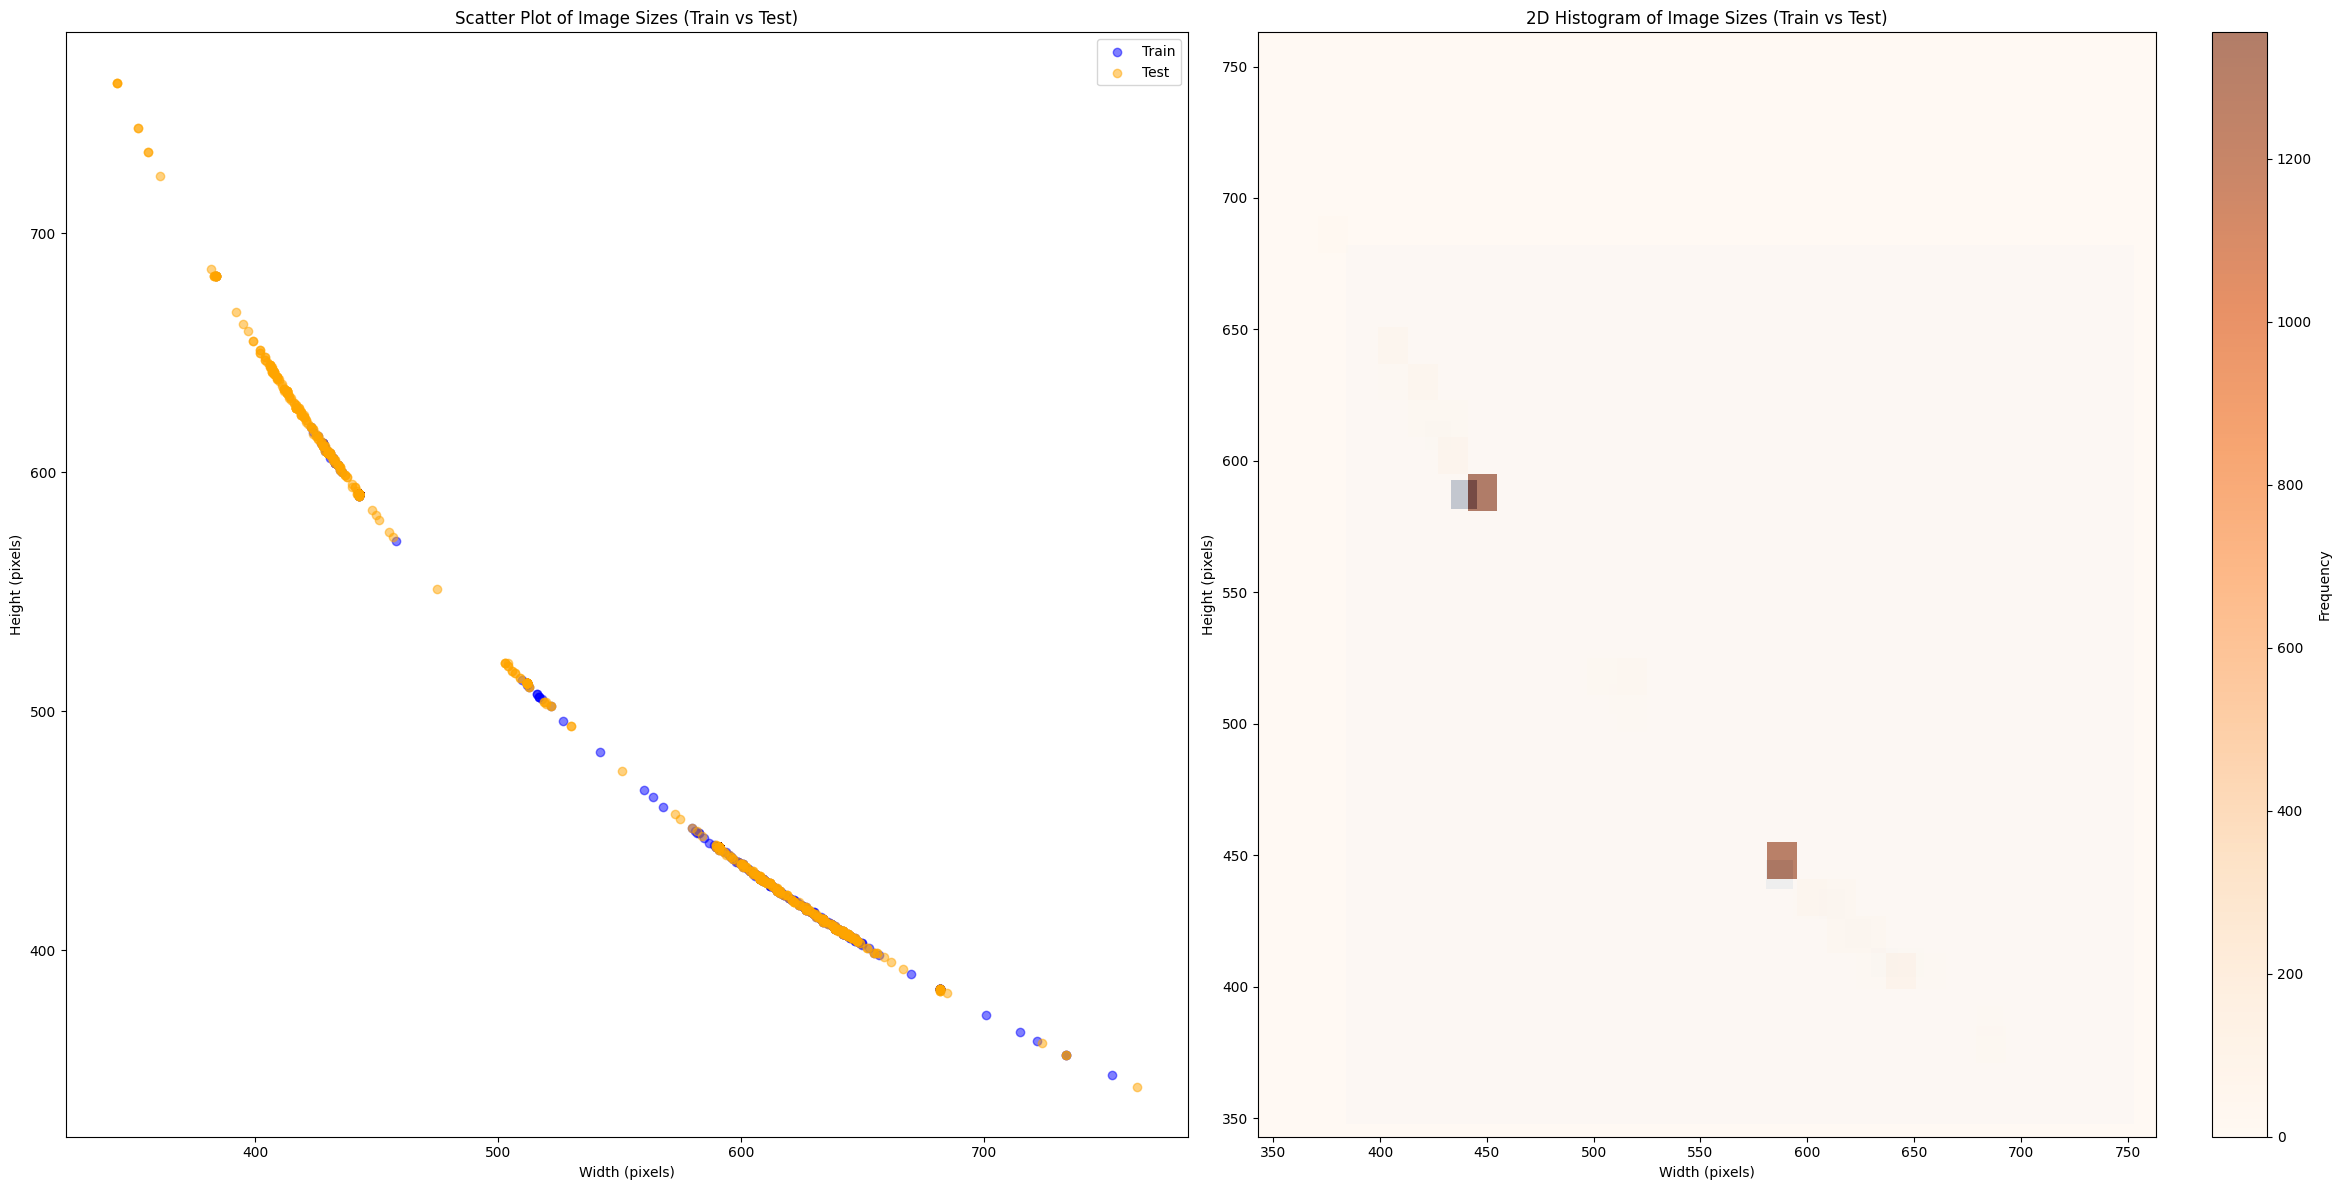

In [9]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# 디렉토리 경로
train_dir = '/root/data/home/data/train'
test_dir = '/root/data/home/data/test'

# 이미지 크기 정보를 저장할 리스트 초기화
train_sizes = []
test_sizes = []

# 이미지 크기 수집 함수
def get_image_sizes(directory):
    sizes = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
            with Image.open(file_path) as img:
                sizes.append(img.size)
    return sizes

# train과 test 데이터셋의 이미지 크기 수집
train_sizes = get_image_sizes(train_dir)
test_sizes = get_image_sizes(test_dir)

# 데이터프레임으로 변환
train_df = pd.DataFrame(train_sizes, columns=['Width', 'Height'])
test_df = pd.DataFrame(test_sizes, columns=['Width', 'Height'])

# 시각화
plt.figure(figsize=(24, 12))

# 1. 산점도 시각화
plt.subplot(1, 2, 1)
plt.scatter(train_df['Width'], train_df['Height'], alpha=0.5, label='Train', color='blue')
plt.scatter(test_df['Width'], test_df['Height'], alpha=0.5, label='Test', color='orange')
plt.title('Scatter Plot of Image Sizes (Train vs Test)')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.legend()

# 2. 2D 히스토그램 시각화
plt.subplot(1, 2, 2)
plt.hist2d(train_df['Width'], train_df['Height'], bins=(30, 30), cmap='Blues', alpha=0.6, label='Train')
plt.hist2d(test_df['Width'], test_df['Height'], bins=(30, 30), cmap='Oranges', alpha=0.6, label='Test')
plt.colorbar(label='Frequency')
plt.title('2D Histogram of Image Sizes (Train vs Test)')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

plt.tight_layout()
plt.show()


In [11]:
# Assuming the permission issue is resolved or if files are provided, here's the complete code to calculate statistical summary
# specifically for the class counts in the 'label' column.

import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
prcd_train_labels_path = '/root/data/home/data/train.csv'
# Load the dataset
def load_prcd_train_labels():
    return pd.read_csv(prcd_train_labels_path)

# Generate class-wise count statistics
def detailed_class_statistics(dataframe, label_column):
    # Count occurrences of each class
    class_counts = dataframe[label_column].value_counts()
    
    # Create a DataFrame for detailed statistics per class
    detailed_stats = pd.DataFrame({
        'Class': class_counts.index,
        'Count': class_counts.values,
        'Min': [class_counts.min()] * len(class_counts),
        'Max': [class_counts.max()] * len(class_counts),
        'Mean': [class_counts.mean()] * len(class_counts),
        'Median': [class_counts.median()] * len(class_counts),
        'Std': [class_counts.std()] * len(class_counts)
    })
    
    return detailed_stats

# Plot class distribution
def plot_class_distribution(class_counts):
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Main code execution
try:
    # Load dataset
    prcd_train_labels = load_prcd_train_labels()
    
    # Generate detailed class statistics
    detailed_stats = detailed_class_statistics(prcd_train_labels, 'target')
    
    # Display detailed class statistics table
    print("Detailed Class Statistics Table:")
    display(detailed_stats)
    
    # Plot class distribution
    plot_class_distribution(prcd_train_labels['label'].value_counts())
    
except Exception as e:
    print("Error encountered:", e)
    print("Please check file permissions or paths.")


Detailed Class Statistics Table:


Class  Count  Min  Max       Mean  Median        Std
0      16    100   46  100  92.352941   100.0  17.849864
1      10    100   46  100  92.352941   100.0  17.849864
2       0    100   46  100  92.352941   100.0  17.849864
3       3    100   46  100  92.352941   100.0  17.849864
4      12    100   46  100  92.352941   100.0  17.849864
5       8    100   46  100  92.352941   100.0  17.849864
6       2    100   46  100  92.352941   100.0  17.849864
7      11    100   46  100  92.352941   100.0  17.849864
8       7    100   46  100  92.352941   100.0  17.849864
9       9    100   46  100  92.352941   100.0  17.849864
10     15    100   46  100  92.352941   100.0  17.849864
11      5    100   46  100  92.352941   100.0  17.849864
12      4    100   46  100  92.352941   100.0  17.849864
13      6    100   46  100  92.352941   100.0  17.849864
14     13     74   46  100  92.352941   100.0  17.849864
15     14     50   46  100  92.352941   100.0  17.849864
16      1     46   46  100  92.352941   100.0  17.849864

Error encountered: 'label'
Please check file permissions or paths.


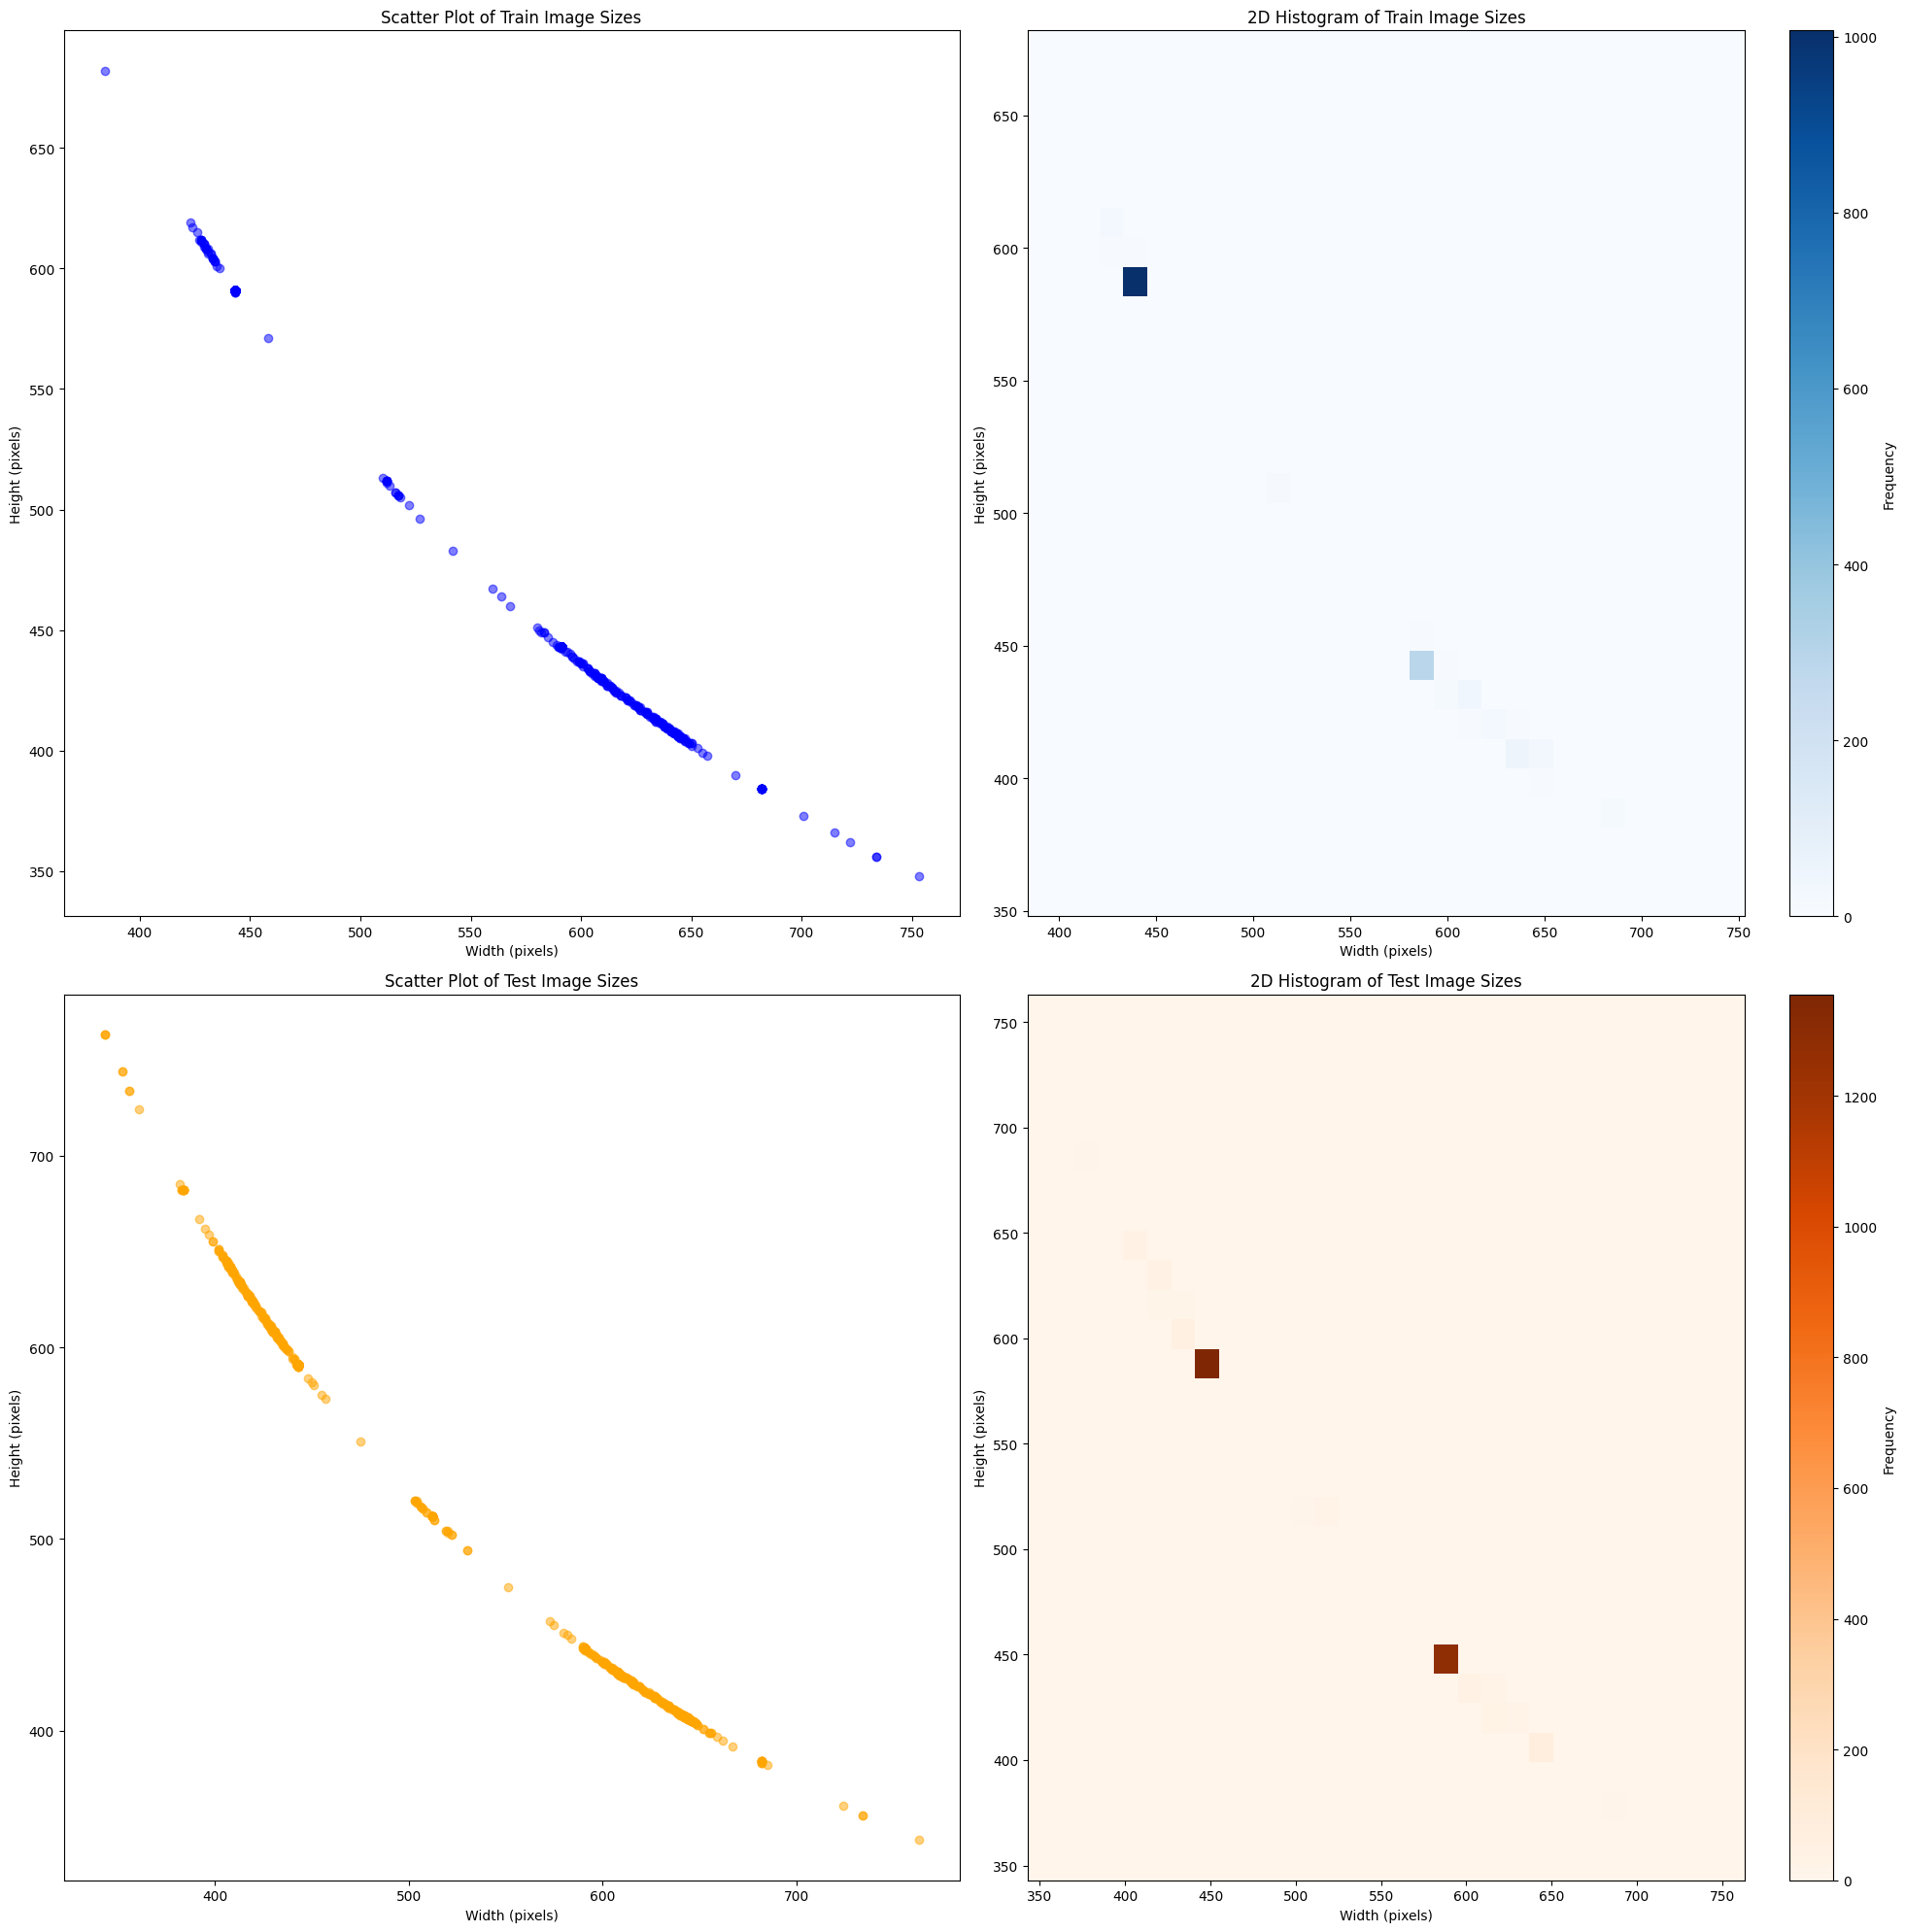

In [11]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# 디렉토리 경로
train_dir = '/root/data/home/data/train'
test_dir = '/root/data/home/data/test'

# 이미지 크기 정보를 저장할 리스트 초기화
train_sizes = []
test_sizes = []

# 이미지 크기 수집 함수
def get_image_sizes(directory):
    sizes = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
            with Image.open(file_path) as img:
                sizes.append(img.size)
    return sizes

# train과 test 데이터셋의 이미지 크기 수집
train_sizes = get_image_sizes(train_dir)
test_sizes = get_image_sizes(test_dir)

# 데이터프레임으로 변환
train_df = pd.DataFrame(train_sizes, columns=['Width', 'Height'])
test_df = pd.DataFrame(test_sizes, columns=['Width', 'Height'])

# 시각화
plt.figure(figsize=(20, 20))

# 1. Train 산점도
plt.subplot(2, 2, 1)
plt.scatter(train_df['Width'], train_df['Height'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Train Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

# 2. Train 2D 히스토그램
plt.subplot(2, 2, 2)
plt.hist2d(train_df['Width'], train_df['Height'], bins=(30, 30), cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('2D Histogram of Train Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

# 3. Test 산점도
plt.subplot(2, 2, 3)
plt.scatter(test_df['Width'], test_df['Height'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Test Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

# 4. Test 2D 히스토그램
plt.subplot(2, 2, 4)
plt.hist2d(test_df['Width'], test_df['Height'], bins=(30, 30), cmap='Oranges')
plt.colorbar(label='Frequency')
plt.title('2D Histogram of Test Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

plt.tight_layout()
plt.show()


# 이미지 오분류 확인

In [4]:
import os
import shutil
import pandas as pd

# 경로 설정
original_train_dir = '/root/data/home/data/train'
labels_file = '/root/data/home/data/train.csv'
new_train_class_dir = '/root/data/home/data/train_class'

# CSV 파일에서 이미지 파일명과 클래스 라벨 읽기
labels_df = pd.read_csv(labels_file)

# 새로운 train_class 디렉토리 생성 (존재하지 않는 경우)
os.makedirs(new_train_class_dir, exist_ok=True)

# 클래스별로 이미지를 분류하여 새로운 폴더에 저장
for _, row in labels_df.iterrows():
    file_name = row['ID']
    class_label = str(row['target'])  # 클래스 이름을 문자열로 변환
    
    # 클래스별 폴더 경로 생성
    class_folder = os.path.join(new_train_class_dir, class_label)
    os.makedirs(class_folder, exist_ok=True)
    
    # 원본 파일 경로와 새로운 파일 경로 설정
    source_file = os.path.join(original_train_dir, file_name)
    target_file = os.path.join(class_folder, file_name)
    
    # 파일을 클래스별 폴더로 복사
    if os.path.isfile(source_file):
        shutil.copy(source_file, target_file)
    else:
        print(f"이미지 파일 {file_name}을(를) 찾을 수 없습니다.")

print("이미지 분류 완료: train_class 폴더에 클래스별로 정리되었습니다.")


이미지 분류 완료: train_class 폴더에 클래스별로 정리되었습니다.


## 이상 이미지 확인

In [1]:
import os
import torch
import pandas as pd
from PIL import Image
from torchvision import models, transforms
from scipy.spatial.distance import cosine
import numpy as np

# 경로 설정
train_class_dir = '/root/data/home/data/train_class'

# ConvNeXt 모델을 사전 훈련된 상태로 불러오기
model = models.convnext_tiny(pretrained=True)
model.classifier[2] = torch.nn.Identity()  # 마지막 분류 레이어 제거
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 이미지 전처리 변환
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 클래스별 이상치 이미지 저장 리스트
outlier_images = []

# 클래스별로 이미지 유사도 분석
for class_folder in os.listdir(train_class_dir):
    class_path = os.path.join(train_class_dir, class_folder)
    if not os.path.isdir(class_path):
        continue
    
    # 이미지 특징 벡터 저장 리스트
    feature_vectors = []
    file_names = []

    # 각 이미지에 대해 특징 벡터 추출
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            image = Image.open(img_path).convert('RGB')
            input_tensor = preprocess(image).unsqueeze(0).to(device)
            with torch.no_grad():
                features = model(input_tensor).cpu().numpy().flatten()
            feature_vectors.append(features)
            file_names.append(img_file)
        except Exception as e:
            print(f"이미지 처리 오류 ({img_file}): {e}")
            continue

    # 유사도 계산 및 이상치 탐지
    if len(feature_vectors) > 1:
        # 모든 이미지 간 코사인 거리 계산
        distances = np.array([[cosine(f1, f2) for f2 in feature_vectors] for f1 in feature_vectors])

        # 각 이미지의 평균 거리 계산
        mean_distances = distances.mean(axis=1)

        # 평균 거리보다 큰 값을 가진 이미지 찾기 (이상치로 간주)
        N = 2  # 임계값 조정
        threshold = mean_distances.mean() + mean_distances.std() * N
        outliers = [file_names[i] for i, d in enumerate(mean_distances) if d > threshold]

        # 이상치 이미지 이름 추가
        outlier_images.extend([(class_folder, outlier) for outlier in outliers])

# 이상치 결과 출력
print("이상치 이미지 목록 (클래스, 이미지 파일명):")
for class_label, outlier_img in outlier_images:
    print(f"클래스 {class_label}: {outlier_img}")


/root/data/home/CV_env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/data/home/CV_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


이상치 이미지 목록 (클래스, 이미지 파일명):
클래스 15: 045ddbf696513987.jpg
클래스 15: a3a762b4e4091608.jpg
클래스 15: e4ab16b5d1f26991.jpg
클래스 15: d8adab6dfec3d43e.jpg
클래스 15: 6c01be75619654ab.jpg
클래스 4: 92c296735de825e0.jpg
클래스 4: e985d6cb79c79810.jpg
클래스 4: 7a5c7b2d02f2dca6.jpg
클래스 4: 2e2d105c5a7df767.jpg
클래스 4: 89d9f15b59eab688.jpg
클래스 10: 13ff4fb604003772.jpg
클래스 10: 5624748fdfd395a8.jpg
클래스 10: 070ac425616e7d20.jpg
클래스 10: 9dcba71716f48706.jpg
클래스 14: 5ba19592cee8212c.jpg
클래스 14: f3d4cabc480bfc06.jpg
클래스 14: 2e3550bead1a72cb.jpg
클래스 14: 4bdec47234b71ffb.jpg
클래스 3: 794938aa61f01452.jpg
클래스 3: 0808c7453316041c.jpg
클래스 3: 43c927101a14247f.jpg
클래스 3: f0c0ce213221e4c1.jpg
클래스 3: da4e329a0b061ab5.jpg
클래스 13: 024fe478044874ab.jpg
클래스 13: 2b1076abe3e4338d.jpg
클래스 16: 527fab11eda98ffa.jpg
클래스 16: 785860603a570231.jpg
클래스 16: 4a7c4627a519f7b6.jpg
클래스 16: 07ed72c124333c68.jpg
클래스 12: 9588b457eec4ae20.jpg
클래스 12: 50857120c1df0665.jpg
클래스 12: 8513926fb711c64f.jpg
클래스 11: 4b8656989ea5a560.jpg
클래스 11: 4bb7fd44ce85cd09.j

In [12]:
import os
import torch
from PIL import Image
from torchvision import models, transforms
import torch.nn.functional as F

# 경로 설정
train_class_dir = '/root/data/home/data/train_class'

# ConvNeXt 모델을 사전 훈련된 상태로 불러오기
model = models.convnext_tiny(pretrained=True)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 이미지 전처리 변환
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 오분류된 이미지 저장 리스트
misclassified_images = []

# 클래스별로 이미지 예측
for class_folder in os.listdir(train_class_dir):
    class_path = os.path.join(train_class_dir, class_folder)
    if not os.path.isdir(class_path):
        continue
    
    # 실제 클래스 레이블을 할당
    true_label = int(class_folder)  # 클래스 폴더 이름이 레이블이라고 가정

    # 각 이미지에 대해 예측 수행
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            # 이미지 열기 및 전처리
            image = Image.open(img_path).convert('RGB')
            input_tensor = preprocess(image).unsqueeze(0).to(device)

            # 모델 예측 수행
            with torch.no_grad():
                output = model(input_tensor)
                predicted_label = output.argmax(dim=1).item()
            
            # 오분류 확인
            if predicted_label != true_label:
                misclassified_images.append((class_folder, img_file, predicted_label))
                
        except Exception as e:
            print(f"이미지 처리 오류 ({img_file}): {e}")
            continue

# 오분류된 이미지 출력
print("오분류된 이미지 목록 (실제 클래스, 이미지 파일명, 예측 클래스):")
for true_class, img_file, predicted_class in misclassified_images:
    print(f"실제 클래스 {true_class} - 이미지 {img_file} - 예측 클래스 {predicted_class}")

/root/data/home/CV_env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/data/home/CV_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


오분류된 이미지 목록 (실제 클래스, 이미지 파일명, 예측 클래스):
실제 클래스 15 - 이미지 0716742e75cfcbbf.jpg - 예측 클래스 916
실제 클래스 15 - 이미지 bc90aa6ad32aac6c.jpg - 예측 클래스 922
실제 클래스 15 - 이미지 ef48d12d2e4ff667.jpg - 예측 클래스 922
실제 클래스 15 - 이미지 0e2d9d02d62c0949.jpg - 예측 클래스 916
실제 클래스 15 - 이미지 045ddbf696513987.jpg - 예측 클래스 549
실제 클래스 15 - 이미지 9223d8c34cef5b99.jpg - 예측 클래스 916
실제 클래스 15 - 이미지 686ac0f84cef81a3.jpg - 예측 클래스 916
실제 클래스 15 - 이미지 c44859ca0d76f24f.jpg - 예측 클래스 922
실제 클래스 15 - 이미지 a4f9d599fd35486e.jpg - 예측 클래스 916
실제 클래스 15 - 이미지 d9eb325083ab816a.jpg - 예측 클래스 916
실제 클래스 15 - 이미지 a7b1a56abef7bcee.jpg - 예측 클래스 922
실제 클래스 15 - 이미지 e55e2da78637ab9a.jpg - 예측 클래스 916
실제 클래스 15 - 이미지 5d377a525796e448.jpg - 예측 클래스 769
실제 클래스 15 - 이미지 721029136b9956ff.jpg - 예측 클래스 916
실제 클래스 15 - 이미지 4334b08d1c84cd7d.jpg - 예측 클래스 922
실제 클래스 15 - 이미지 d941da0b32375b7b.jpg - 예측 클래스 922
실제 클래스 15 - 이미지 e1e672f2d5adb64c.jpg - 예측 클래스 916
실제 클래스 15 - 이미지 ae716e6f75abc9e1.jpg - 예측 클래스 922
실제 클래스 15 - 이미지 97e2aa947f74f55b.jpg - 예측 클래스 922
실제 클래스 15 -

In [9]:
len(outlier_images)

1

클래스: 2, 파일명: 5a18fb6fb6906ba3.jpg


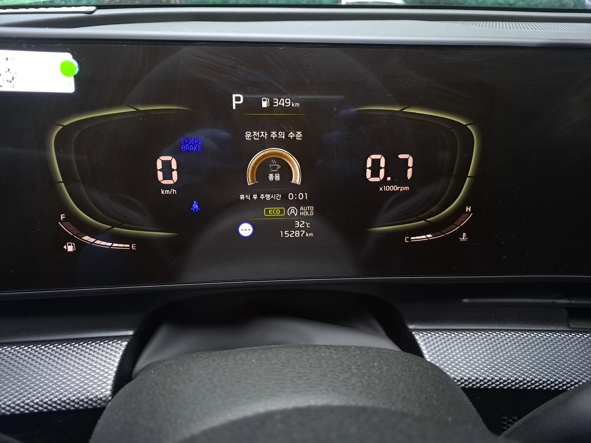

In [11]:
from PIL import Image
from IPython.display import display

# 이상치 이미지 경로 설정
outlier_dir = train_class_dir  # train_class_dir 변수를 이상치 이미지의 루트 디렉터리로 설정

# 이상치 이미지 표시 (최대 5개)
for i, (class_label, outlier_img) in enumerate(outlier_images[:]):  # 5개의 이미지만 표시
    img_path = os.path.join(outlier_dir, class_label, outlier_img)
    try:
        image = Image.open(img_path)
        print(f"클래스: {class_label}, 파일명: {outlier_img}")
        display(image)
    except Exception as e:
        print(f"이미지 로드 오류 ({img_path}): {e}")


## OCR을 통한 이미지 유사도 파악

In [28]:
import os
import pytesseract
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 경로 설정
train_class_dir = '/root/data/home/data/train_class'

# OCR 설정
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'  # Tesseract 설치 경로 지정

# 이상치 저장 리스트
outlier_images = []

# 클래스별로 OCR 기반 이상치 탐지
for class_folder in os.listdir(train_class_dir):
    class_path = os.path.join(train_class_dir, class_folder)
    if not os.path.isdir(class_path):
        continue

    texts = []
    file_names = []

    # 각 이미지에서 텍스트 추출
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            image = Image.open(img_path)
            text = pytesseract.image_to_string(image)
            texts.append(text)
            file_names.append(img_file)
        except Exception as e:
            print(f"이미지 처리 오류 ({img_file}): {e}")
            continue

    # 텍스트 유사도 분석
    if len(texts) > 1:
        vectorizer = TfidfVectorizer().fit_transform(texts)
        vectors = vectorizer.toarray()
        cosine_matrix = cosine_similarity(vectors)

        # 평균 코사인 유사도 계산
        mean_similarities = cosine_matrix.mean(axis=1)

        # 임계값을 설정하여 이상치로 간주할 이미지 찾기
        threshold = mean_similarities.mean() - mean_similarities.std() * 1.5  # 필요시 임계값 조정
        outliers = [file_names[i] for i, sim in enumerate(mean_similarities) if sim < threshold]

        # 이상치 이미지 추가
        outlier_images.extend([(class_folder, outlier) for outlier in outliers])

# 이상치 출력
print("이상치 이미지 목록 (클래스, 이미지 파일명):")
for class_label, outlier_img in outlier_images:
    print(f"클래스 {class_label}: {outlier_img}")


KeyboardInterrupt: 

In [32]:
import os
import pytesseract
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm  # tqdm 임포트

# 경로 설정
train_class_dir = '/root/data/home/data/train_class'

# OCR 설정
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'  # Tesseract 설치 경로 지정

# 이상치 저장 리스트
outlier_images = []

# 클래스별로 OCR 기반 이상치 탐지
for class_folder in os.listdir(train_class_dir):
    class_path = os.path.join(train_class_dir, class_folder)
    if not os.path.isdir(class_path):
        continue

    texts = []
    file_names = []

    # 각 이미지에서 텍스트 추출 (tqdm을 사용하여 진행상황 표시)
    for img_file in tqdm(os.listdir(class_path), desc=f'Processing {class_folder}'):
        img_path = os.path.join(class_path, img_file)
        try:
            image = Image.open(img_path)
            text = pytesseract.image_to_string(image)
            texts.append(text)
            file_names.append(img_file)
        except Exception as e:
            print(f"이미지 처리 오류 ({img_file}): {e}")
            continue

    # 텍스트 유사도 분석
    if len(texts) > 1:
        vectorizer = TfidfVectorizer().fit_transform(texts)
        vectors = vectorizer.toarray()
        cosine_matrix = cosine_similarity(vectors)

        # 평균 코사인 유사도 계산
        mean_similarities = cosine_matrix.mean(axis=1)

        # 임계값을 설정하여 이상치로 간주할 이미지 찾기
        threshold = mean_similarities.mean() - mean_similarities.std() * 3  # 필요시 임계값 조정
        outliers = [file_names[i] for i, sim in enumerate(mean_similarities) if sim < threshold]

        # 이상치 이미지 추가
        outlier_images.extend([(class_folder, outlier) for outlier in outliers])

# 이상치 출력
print("이상치 이미지 목록 (클래스, 이미지 파일명):")
for class_label, outlier_img in outlier_images:
    print(f"클래스 {class_label}: {outlier_img}")


Processing 2: 100%|██████████| 100/100 [00:10<00:00,  9.34it/s]

이상치 이미지 목록 (클래스, 이미지 파일명):
클래스 9: 37a581964c5dd537.jpg
클래스 9: c4430e6c1890dbb8.jpg


In [40]:
import os
import easyocr
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm  # tqdm 임포트

# EasyOCR 설정
reader = easyocr.Reader(['ko', 'en'])  # 한국어와 영어 지원 설정

# 경로 설정
train_class_dir = '/root/data/home/data/train_class'

# 이상치 저장 리스트
outlier_images = []

# 클래스별로 OCR 기반 이상치 탐지
for class_folder in os.listdir(train_class_dir):
    class_path = os.path.join(train_class_dir, class_folder)
    if not os.path.isdir(class_path):
        continue

    texts = []
    file_names = []

    # 각 이미지에서 텍스트 추출 (tqdm을 사용하여 진행상황 표시)
    for img_file in tqdm(os.listdir(class_path), desc=f'Processing {class_folder}'):
        img_path = os.path.join(class_path, img_file)
        try:
            image = Image.open(img_path)
            # EasyOCR을 사용하여 텍스트 추출
            results = reader.readtext(np.array(image), detail=0)
            text = " ".join(results)  # 추출된 텍스트를 하나의 문자열로 결합
            texts.append(text)
            file_names.append(img_file)
        except Exception as e:
            print(f"이미지 처리 오류 ({img_file}): {e}")
            continue

    # 텍스트 유사도 분석
    if len(texts) > 1:
        vectorizer = TfidfVectorizer().fit_transform(texts)
        vectors = vectorizer.toarray()
        cosine_matrix = cosine_similarity(vectors)

        # 평균 코사인 유사도 계산
        mean_similarities = cosine_matrix.mean(axis=1)

        # IQR 기반으로 이상치 탐지
        Q1 = np.percentile(mean_similarities, 25)
        Q3 = np.percentile(mean_similarities, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 상한 또는 하한을 벗어나는 이미지 찾기
        outliers = [file_names[i] for i, sim in enumerate(mean_similarities) if sim < lower_bound or sim > upper_bound]

        # 이상치 이미지 추가
        outlier_images.extend([(class_folder, outlier) for outlier in outliers])

# 이상치 출력
print("이상치 이미지 목록 (클래스, 이미지 파일명):")
for class_label, outlier_img in outlier_images:
    print(f"클래스 {class_label}: {outlier_img}")


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

Processing 2: 100%|██████████| 100/100 [00:07<00:00, 12.83it/s]

이상치 이미지 목록 (클래스, 이미지 파일명):
클래스 15: 304fd1de239ea7c6.jpg
클래스 15: 90bed2b1fe15453b.jpg
클래스 10: e8e698529229a72a.jpg
클래스 14: b4d81dc41055abf2.jpg
클래스 14: 76ff32bef566bd38.jpg
클래스 3: df03f4facff2b3e7.jpg
클래스 13: 5d4c9847047f46cc.jpg
클래스 13: 89d732f04315272b.jpg
클래스 13: 6ab9dd9b5f52f39c.jpg
클래스 16: 1dc625f3328476d7.jpg
클래스 16: 356ae63d8d2c9a4b.jpg
클래스 16: 64de0d5782390458.jpg
클래스 16: 00b2f44967580c74.jpg
클래스 16: 7f264f1599b1a740.jpg
클래스 16: c7315ae3066ad68d.jpg
클래스 16: da9a22b593000ffe.jpg
클래스 16: 6803ce25ed4d3617.jpg
클래스 16: 4a7c4627a519f7b6.jpg
클래스 16: d6e84bf25de1298a.jpg
클래스 16: 27e97a7637f1f1c4.jpg
클래스 16: 4fd4d1f693c164e6.jpg
클래스 16: e6e4186f462c590e.jpg
클래스 16: e4b25bf0fc41b317.jpg
클래스 16: 579be43726250a48.jpg
클래스 12: 1070b99464cb9755.jpg
클래스 12: 2bd137d9e8c2a8d9.jpg
클래스 11: 417c039e080304c5.jpg
클래스 0: 108c622ecd7a9ea0.jpg
클래스 0: bad74cc95cee3c75.jpg
클래스 0: eab87d51f62cb63e.jpg
클래스 0: e5a0d2a785508cfb.jpg
클래스 0: 765341e233dcaa33.jpg
클래스 0: df1caa3d9f344b5a.jpg
클래스 0: 6b0dd94eaf6694db

In [66]:
import os
import pytesseract
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm  # tqdm 임포트

# 경로 설정
train_class_dir = '/root/data/home/data/train_class'

# OCR 설정
# EasyOCR 설정
reader = easyocr.Reader(['ko', 'en'])  # 한국어와 영어 지원 설정

# 이상치 저장 리스트
outlier_images = []
# 텍스트가 없는 이미지 저장 리스트
empty_text_images = []

# 클래스별로 OCR 기반 이상치 탐지
for class_folder in os.listdir(train_class_dir):
    class_path = os.path.join(train_class_dir, class_folder)
    if not os.path.isdir(class_path):
        continue

    texts = []
    file_names = []
    empty_files = []

    # 각 이미지에서 텍스트 추출 (tqdm을 사용하여 진행상황 표시)
    for img_file in tqdm(os.listdir(class_path), desc=f'Processing {class_folder}'):
        img_path = os.path.join(class_path, img_file)
        try:
            image = Image.open(img_path)
            # EasyOCR을 사용하여 텍스트 추출
            results = reader.readtext(np.array(image), detail=0)
            text = " ".join(results)  # 추출된 텍스트를 하나의 문자열로 결합
            texts.append(text)
            file_names.append(img_file)
        except Exception as e:
            print(f"이미지 처리 오류 ({img_file}): {e}")
            continue

    # 글자가 없는 이미지 파일명을 클래스별로 저장
    empty_text_images.extend([(class_folder, empty_file) for empty_file in empty_files])

    # 텍스트 유사도 분석
    if len(texts) > 1:
        vectorizer = TfidfVectorizer().fit_transform(texts)
        vectors = vectorizer.toarray()
        cosine_matrix = cosine_similarity(vectors)

        # 평균 코사인 유사도 계산
        mean_similarities = cosine_matrix.mean(axis=1)

        # 임계값을 설정하여 이상치로 간주할 이미지 찾기
        N=1.5
        threshold = mean_similarities.mean() - mean_similarities.std() * N  # 필요시 임계값 조정
        outliers = [file_names[i] for i, sim in enumerate(mean_similarities) if sim < threshold]

        # 이상치 이미지 추가
        outlier_images.extend([(class_folder, outlier) for outlier in outliers])
        
# 이상치 출력
print("이상치 이미지 목록 (클래스, 이미지 파일명):")
for class_label, outlier_img in outlier_images:
    print(f"클래스 {class_label}: {outlier_img}")

# 텍스트가 없는 이미지 출력
print("\n텍스트가 없는 이미지 목록 (클래스, 이미지 파일명):")
for class_label, empty_img in empty_text_images:
    print(f"클래스 {class_label}: {empty_img}")


Processing 2: 100%|██████████| 100/100 [00:07<00:00, 12.72it/s]

이상치 이미지 목록 (클래스, 이미지 파일명):
클래스 15: 045ddbf696513987.jpg
클래스 15: 304fd1de239ea7c6.jpg
클래스 15: 824f40bb56fb0e4d.jpg
클래스 15: 02d404271e4965fa.jpg
클래스 15: aea1e441afe77b1b.jpg
클래스 15: d1278f7e49b24296.jpg
클래스 4: 926cb3040efcf9d4.jpg
클래스 10: 4efd4cc11e8c8d5e.jpg
클래스 10: 1a7b8a8cfc41b2b2.jpg
클래스 10: 070ac425616e7d20.jpg
클래스 10: 785c49e3d1d44486.jpg
클래스 10: 026817f3f9434f5b.jpg
클래스 10: 6a2c867603ef83d9.jpg
클래스 3: 706cc6881b18b291.jpg
클래스 3: 1cc56bce8c1d4a39.jpg
클래스 3: 513a76b111c229cf.jpg
클래스 3: be53872196b3ae1d.jpg
클래스 16: 4a7c4627a519f7b6.jpg
클래스 16: 4fd4d1f693c164e6.jpg
클래스 12: 3958ff328e348138.jpg
클래스 12: 06e51d188361295c.jpg
클래스 12: 2a782453c0dc8083.jpg
클래스 12: 85abfc517a6b2e9a.jpg
클래스 12: 20cdc47ce476427a.jpg
클래스 12: 8145e009ad6dd52d.jpg
클래스 11: 1bc94a114eba1a7b.jpg
클래스 11: 47bfeda81405c1dd.jpg
클래스 11: de6debaeedbdabac.jpg
클래스 11: 5e6bbdf399b21611.jpg
클래스 8: 2552a6625015ace2.jpg
클래스 1: f0d11155d48758de.jpg
클래스 1: 794779cd2ac51622.jpg
클래스 1: a683764ced480eb3.jpg
클래스 5: f45f490c82c43c39.j

In [67]:
len(outlier_images)

50

In [68]:
from PIL import Image
from IPython.display import display

# 이상치 이미지 경로 설정
outlier_dir = train_class_dir  # train_class_dir 변수를 이상치 이미지의 루트 디렉터리로 설정

# 이상치 이미지 표시 (최대 5개)
for i, (class_label, outlier_img) in enumerate(empty_text_images[:5]):  # 5개의 이미지만 표시
    img_path = os.path.join(outlier_dir, class_label, outlier_img)
    try:
        image = Image.open(img_path)
        print(f"클래스: {class_label}, 파일명: {outlier_img}")
        display(image)
    except Exception as e:
        print(f"이미지 로드 오류 ({img_path}): {e}")


In [71]:
from PIL import Image
from IPython.display import display

# 이상치 이미지 경로 설정
outlier_dir = train_class_dir  # train_class_dir 변수를 이상치 이미지의 루트 디렉터리로 설정

# 이상치 이미지 표시 (최대 5개)
for i, (class_label, outlier_img) in enumerate(outlier_images[:]):  # 5개의 이미지만 표시
    img_path = os.path.join(outlier_dir, class_label, outlier_img)
    try:
        image = Image.open(img_path)
        print(f"클래스: {class_label}, 파일명: {outlier_img}")
        display(image)
    except Exception as e:
        print(f"이미지 로드 오류 ({img_path}): {e}")


# 테스트